# Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.

● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.

In [42]:
from scipy import stats
from scipy.stats import chi2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv(r'C:\Users\91999\Downloads\Sales_add.csv')

In [44]:
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [45]:
df.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [46]:
df.shape

(22, 5)

In [47]:
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [49]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


**● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing**

H0 :- The Mean of Sales before digital marketing and Sales after digital marketing  are equal i.e., μ1 = μ2 [means of the samples are equal]

H1:- The Mean of Sales before digital marketing and Sales after digital marketing are not equal i.e.,  μ1 ≠ μ2 [means of the samples are not equal]

In [50]:
df[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [81]:
# Paired t test
ttest,pval = stats.ttest_rel(df['Sales_before_digital_add(in $)'], df['Sales_After_digital_add(in $)'])
print('p-value:',pval)

p-value: 6.336667004575778e-11


In [52]:
# Result
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


Text(0.5, 1.0, 'Sales before(in $)  vs  Sales After(in $)')

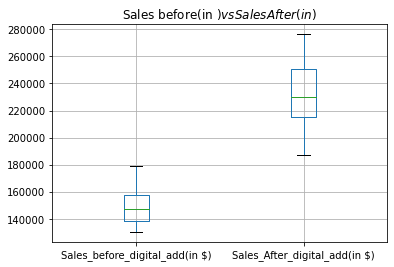

In [91]:
df.plot.box(grid= True)
plt.title('Sales before(in $)  vs  Sales After(in $)')

<AxesSubplot:ylabel='Density'>

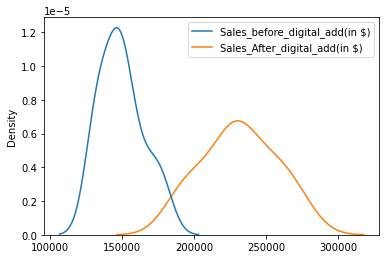

In [53]:
sns.kdeplot(data=df)

* From both hypothesis test and graph, there is an increase in sales after stepping into digital marketing.

**● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.**

In [64]:
# contingency table
contingency_table=pd.crosstab(df['Region'],df['Manager'],margins=True)
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Manager     Manager - A  Manager - B  Manager - C  All
Region                                                
Region - A            4            3            3   10
Region - B            4            1            2    7
Region - C            1            3            1    5
All                   9            7            6   22


In [78]:
# Observed values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)
b=stats.chi2_contingency(contingency_table)

Observed Values :-
 [[ 4  3  3 10]
 [ 4  1  2  7]
 [ 1  3  1  5]
 [ 9  7  6 22]]


In [79]:
# Expected values
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 4.09090909  3.18181818  2.72727273 10.        ]
 [ 2.86363636  2.22727273  1.90909091  7.        ]
 [ 2.04545455  1.59090909  1.36363636  5.        ]
 [ 9.          7.          6.         22.        ]]


In [80]:
# Degree of freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

Degree of Freedom:- 1


In [71]:
# Significance level
alpha=0.05
print('Significance level:',alpha)

Significance level: 0.05


In [ ]:
# Chi_square statics
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

In [58]:
# Critical value
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

chi-square statistic:- 2.921995464852608
critical_value: 3.841458820694124


In [68]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

p-value: 0.08737974495299139


In [77]:
# Result
if chi_square_statistic>=critical_value:
    print('Reject H0,there is a dependency between the features Region and Manager')
else:
    print('Retain H0,there is no dependency between the features Region and Manager')
    
if p_value<=alpha:
    print('Reject H0,there is a dependency between the features Region and Manager')
else:
    print('Retain H0,there is no dependency between the features Region and Manager')

Retain H0,there is no dependency between the features Region and Manager
Retain H0,there is no dependency between the features Region and Manager


In [ ]:
# by Sidharth